In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,\
precision_score, recall_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


In [2]:
# df = pd.read_csv('heatwave_data_2.csv')
df = pd.read_csv('heatwave_data_final.csv')

In [53]:
# df = df.drop('Heatwave', axis=1)
# df0 = df[df['clusters']==0]
# df1 = df[df['clusters']==1]
# df2 = df[df['clusters']==2]
# df3 = df[df['clusters']==3]
# df4 = df[df['clusters']==4]
# df5 = df[df['clusters']==5]



In [54]:
# dfs = [df0, df1, df2, df3, df4, df5]
# qtiles = []
# for dfi in dfs:
#     qtiles.append(dfi['t2m'].quantile(q=0.95))

# def assign_htwave(row):
#     if row['clusters'] == 0:
#         if row['t2m'] >= qtiles[0]:
#             return 1
#     elif row['clusters'] == 1:
#         if row['t2m'] >= qtiles[1]:
#             return 1
#     elif row['clusters'] == 2:
#         if row['t2m'] >= qtiles[2]:
#             return 1
#     elif row['clusters'] == 3:
#         if row['t2m'] >= qtiles[3]:
#             return 1
#     elif row['clusters'] == 4:
#         if row['t2m'] >= qtiles[4]:
#             return 1
#     elif row['clusters'] == 5:
#         if row['t2m'] >= qtiles[5]:
#             return 1
#     else:
#         return 0
    
# df['Heatwave'] = df.apply(assign_htwave, axis=1)

In [55]:
#df['Heatwave'].fillna(value=0, inplace=True)

In [4]:
# df.dropna(inplace=True)
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['time', 'latitude', 'longitude', 
#                                                        'year_y', 'month_y', 'clusters'], axis=1)), 
#                          columns=scaler.get_feature_names_out())
# df_cl = pd.concat([df[['time', 'latitude', 'longitude']], df_scaled], axis=1)
# #df_cl.dropna(inplace=True, axis=0)
# agg_press = df_cl.groupby(['time', 'latitude', 'longitude']).mean()
# agg_time = agg_press.groupby(['latitude', 'longitude']).mean()


c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

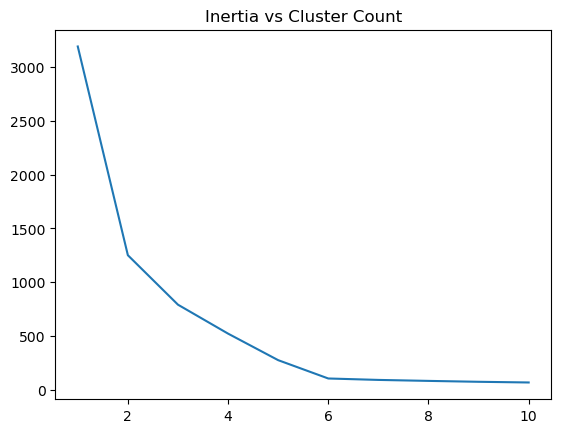

In [11]:
# ks = np.arange(1, 11)
# inertias = []
# for k in ks: 
#     kmeans = KMeans(n_clusters=k, random_state=0, 
#                     n_init=10).fit(agg_time.reset_index().drop(['latitude', 'longitude'], axis=1))
#     inertias.append(kmeans.inertia_)

# sns.lineplot(x=ks, y=inertias)
# plt.title('Inertia vs Cluster Count')
# plt.show()

In [12]:
# kmeans = KMeans(n_clusters=6, random_state=0, 
#                     n_init=10).fit(agg_time.reset_index().drop(['latitude', 'longitude'], axis=1))

c:\Python\envs\eeps1720_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [13]:
# agg_time['cluster'] = kmeans.labels_

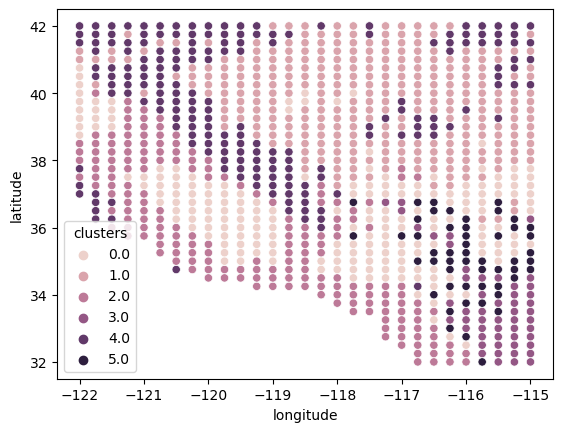

In [4]:
agg_press = df.groupby(['time', 'latitude', 'longitude']).mean()
agg_time = agg_press.groupby(['latitude', 'longitude']).mean()
sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='clusters')
plt.show()

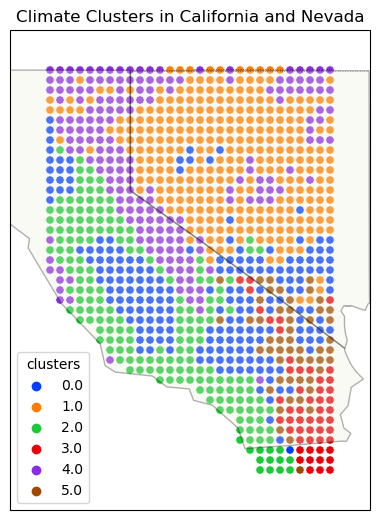

In [5]:
lats,lons = agg_time.reset_index()['latitude'],agg_time.reset_index()['longitude']

ax = plt.axes([0, 0, 1, 1],
              projection=ccrs.PlateCarree())

ax.set_extent([-123, -114, 31, 43], ccrs.Geodetic())  
sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='clusters', ax=ax, palette='bright')  
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name='admin_1_states_provinces')
for i in shpreader.Reader(states_shp).records():
    if (i.attributes['postal'] == "CA") or (i.attributes['postal'] == "NV"):
        ax.add_geometries([i.geometry], ccrs.PlateCarree(),facecolor=[0.9375, 0.9375, 0.859375], 
                          alpha=0.3, edgecolor='black')
    else:
        pass
ax.scatter(lats,lons,transform=ccrs.PlateCarree(),zorder=100)
plt.title('Climate Clusters in California and Nevada')
plt.show()


In [15]:
# d = {}
# for index, item in agg_time.reset_index().iterrows():
#     d[(item['latitude'], item['longitude'])] = item['cluster']

In [16]:
# def mapper(col1, col2):
#     return d[(col1, col2)]

In [17]:
# df['clusters'] = df.apply(lambda x: mapper(x['latitude'], x['longitude']), axis=1)

In [20]:
# def mapper2(row):
#     if row['Heatwave'] == 'Positive':
#         return 1
#     else:
#         return 0

In [21]:
# df['Heatwave'] = df.apply(mapper2, axis=1)

In [58]:
# df.to_csv('heatwave_data_final.csv', index=False)

## EDA

In [43]:
agg_press = df.groupby(['time', 'latitude', 'longitude']).mean()
agg_time = agg_press.groupby(['latitude', 'longitude']).mean()
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='t2m')
# plt.title('Average Temperature Across California and Nevada')
# plt.show()

In [11]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='z')
# plt.title('Average Geopotential Height Across California and Nevada')
# plt.show()

In [91]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='pv')
# plt.title('Average Potential Vorticity Across California and Nevada')
# plt.show()

In [92]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='q')
# plt.title('Average Specific Humidity Across California and Nevada')
# plt.show()

In [93]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='vo')
# plt.title('Average Relative Vorticity Across California and Nevada')
# plt.show()

In [94]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='u')
# plt.title('Average U Wind Component Across California and Nevada')
# plt.show()

In [95]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='v')
# plt.title('Average V Wind Component Across California and Nevada')
# plt.show()

In [96]:
# sns.scatterplot(x='longitude', y='latitude', data=agg_time, hue='r')
# plt.title('Average Relative Humidity Across California and Nevada')
# plt.show()

In [97]:
# plot = sns.FacetGrid(data=df, col='isobaricInhPa')
# plot.map(sns.scatterplot, 'z', 't2m')
# sns.relplot(x='z', y='t2m', data=df, row='isobaricInhPa')
# plt.title('Temperature vs. Geopotential Height')
# plt.show()

In [98]:
# sns.relplot(x='pv', y='t2m', data=df, row='isobaricInhPa')
# plt.title('Temperature vs. Potential Vorticity')
# plt.show()

## Preprocessing

In [6]:
# Create Cluster data frames
df0 = df[df['clusters']==0]
df1 = df[df['clusters']==1]
df2 = df[df['clusters']==2]
df3 = df[df['clusters']==3]
df4 = df[df['clusters']==4]
df5 = df[df['clusters']==5]

# Group by time and pressure to flatten the data frames
dftp0 = df0.groupby(['time', 'isobaricInhPa']).mean().reset_index()
dftp1 = df1.groupby(['time', 'isobaricInhPa']).mean().reset_index()
dftp2 = df2.groupby(['time', 'isobaricInhPa']).mean().reset_index()
dftp3 = df3.groupby(['time', 'isobaricInhPa']).mean().reset_index()
dftp4 = df4.groupby(['time', 'isobaricInhPa']).mean().reset_index()
dftp5 = df5.groupby(['time', 'isobaricInhPa']).mean().reset_index()

dfs = [dftp0, dftp1, dftp2, dftp3, dftp4, dftp5]

In [7]:
# Flatten the pressure levels of the data frames
def mapper4(row):
    if row['Heatwave'] > 0:
        return 1
    else:
        return 0
    
new_dfs = []
for df in dfs:

    df.drop(['month_y', 'year_y', 'latitude', 'longitude'], axis=1, inplace=True)

        
    df['Heatwave'] = df.apply(mapper4, axis=1)

    dfp3 = df[df['isobaricInhPa']==300]
    dfp5 = df[df['isobaricInhPa']==500]
    dfp7 = df[df['isobaricInhPa']==700]

    dfts = dfp7.merge(dfp3.merge(dfp5, on='time', how='inner', suffixes=('_300', '_500')),
                    on='time', how='inner')

    dfts.drop(['t2m_500', 't2m_300', 'Heatwave_500', 'Heatwave_300', 'clusters_300',
            'clusters_500', 'isobaricInhPa_300', 'isobaricInhPa_500', 'isobaricInhPa'], inplace=True, axis=1)
    new_dfs.append(dfts)



In [8]:
# Code adapted from Brownlee, 2017. Cited and linked in paper
def series_to_supervised(data, columns, index, n_in=1, n_out=1, dropnan=True):
 """
 Frame a time series as a supervised learning dataset.
 Arguments:
 data: Sequence of observations as a list or NumPy array.
 n_in: Number of lag observations as input (X).
 n_out: Number of observations as output (y).
 dropnan: Boolean whether or not to drop rows with NaN values.
 Returns:
 Pandas DataFrame of series framed for supervised learning.
 """
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data, index=index)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [(columns[j]+'(t-%d)' % (i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [(columns[j]+'(t)') for j in range(n_vars)]
    else:
      names += [(columns[j]+'(t+%d)' % (i)) for j in range(n_vars)]
 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
    agg.dropna(inplace=True)
 return agg




In [81]:
c0_metrics = []
c1_metrics = []
c2_metrics = []
c3_metrics = []
c4_metrics = []
c5_metrics = []
metrics_lists = [c0_metrics, c1_metrics, c2_metrics, c3_metrics, c4_metrics, c5_metrics]

## Baseline Model: Temperature Inputs Only
As a baseline to compare against, we start with a random forest model that only looks at the previous days' temperatures to make heatwave predictions

In [82]:
bdfs = []
for df in new_dfs:
    # Selecting relevant variables to include for each cluster
    df['time'] = pd.to_datetime(df['time'])
    bdfs.append(df[['time', 't2m', 'Heatwave']].set_index('time'))

baselines = []
for df in bdfs:
    # For each cluster, transform the data frame into a data frame with lagged columns up to 
    # 10 days before the current one
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10)
    
    # Drop the current day temperature so it doesn't get overweighted in the prediction
    data.drop('t2m(t)', inplace=True, axis=1)
    data.reset_index(inplace=True)

    # Filter out the first 10 days of May so it doesn't use data from the previous year's September
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data.set_index('time', inplace=True)
    baselines.append(data)

In [83]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

# Because it's a time series problem, train on the 1st 80% of dates, and test on the last 20%
for df in baselines:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-1])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-1])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -1])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -1])

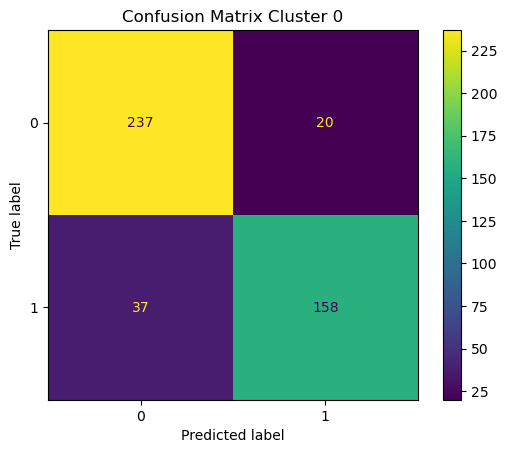

Accuracy Cluster 0:  0.8738938053097345
Precision Cluster 0:  0.8876404494382022
Recall Cluster 0:  0.8102564102564103


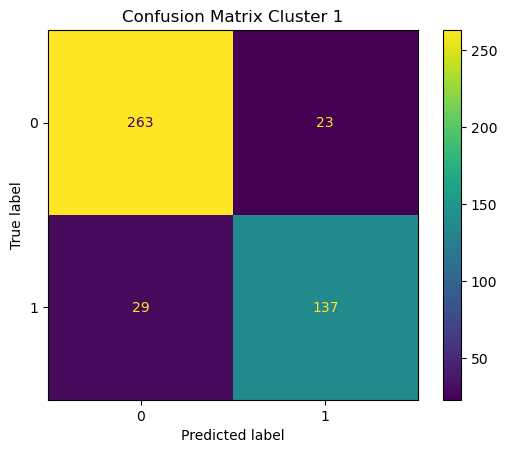

Accuracy Cluster 1:  0.8849557522123894
Precision Cluster 1:  0.85625
Recall Cluster 1:  0.8253012048192772


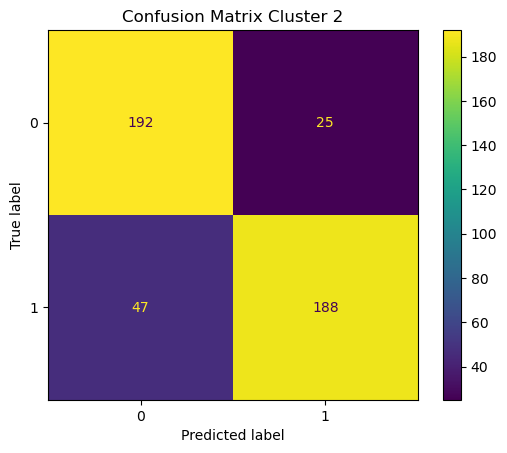

Accuracy Cluster 2:  0.8407079646017699
Precision Cluster 2:  0.8826291079812206
Recall Cluster 2:  0.8


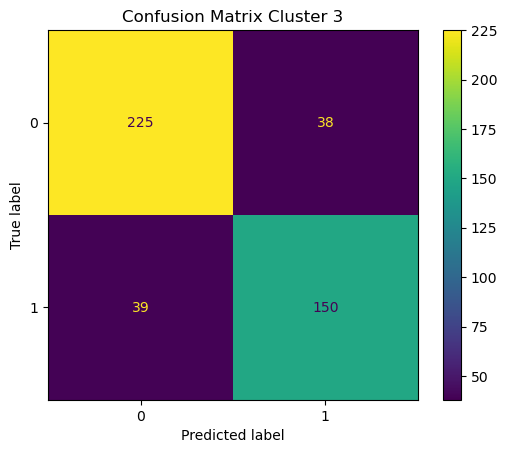

Accuracy Cluster 3:  0.8296460176991151
Precision Cluster 3:  0.7978723404255319
Recall Cluster 3:  0.7936507936507936


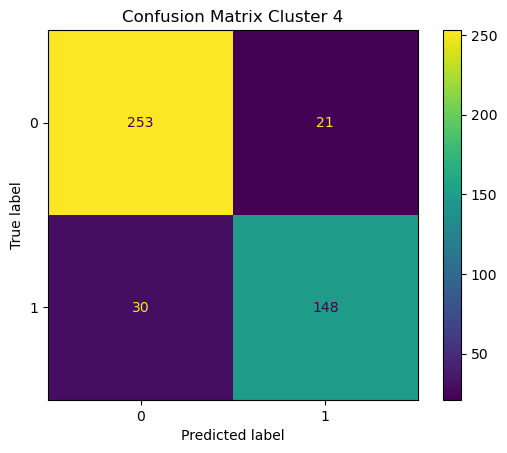

Accuracy Cluster 4:  0.8871681415929203
Precision Cluster 4:  0.8757396449704142
Recall Cluster 4:  0.8314606741573034


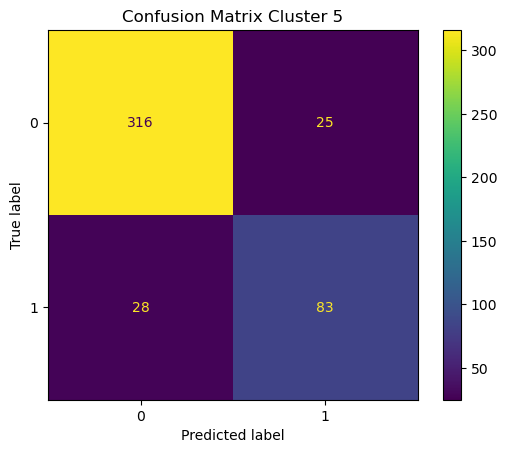

Accuracy Cluster 5:  0.8827433628318584
Precision Cluster 5:  0.7685185185185185
Recall Cluster 5:  0.7477477477477478


In [84]:
for i in range(len(baselines)):
    rf = RandomForestClassifier(n_estimators=100)
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    acc = accuracy_score(test_ys[i], y_pred)
    cm = confusion_matrix(test_ys[i], y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append((acc, precision_score(test_ys[i], y_pred), recall_score(test_ys[i], y_pred)))
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred))

In [85]:
# Should compute heatwave values in each cluster separately not over the entire data set

## First Model: Random Forest with Geopotential Height and Potential Vorticity

In [86]:
df_simple = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    df_simple.append(df[['time', 't2m', 'z', 'z_300', 'z_500', 'pv', 'pv_300', 'pv_500',
                  'Heatwave']].set_index('time'))

fst_model = []
for df in df_simple:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10)
    data.drop(['t2m(t)', 'z(t)', 'pv(t)', 'z_300(t)', 'z_500(t)', 
           'pv_300(t)', 'pv_500(t)'], inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data.set_index('time', inplace=True)
    fst_model.append(data)


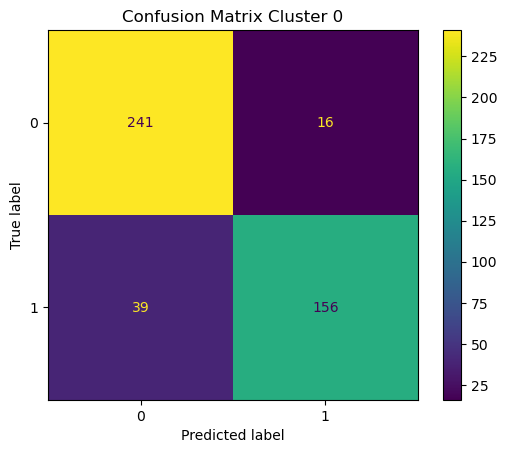

Accuracy Cluster 0:  0.8783185840707964
Precision Cluster 0:  0.9069767441860465
Recall Cluster 0:  0.8


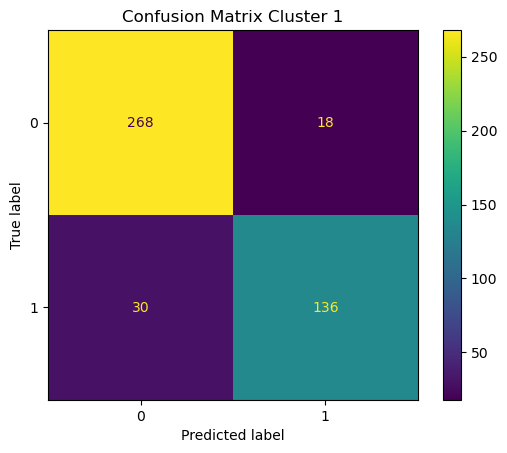

Accuracy Cluster 1:  0.8938053097345132
Precision Cluster 1:  0.8831168831168831
Recall Cluster 1:  0.8192771084337349


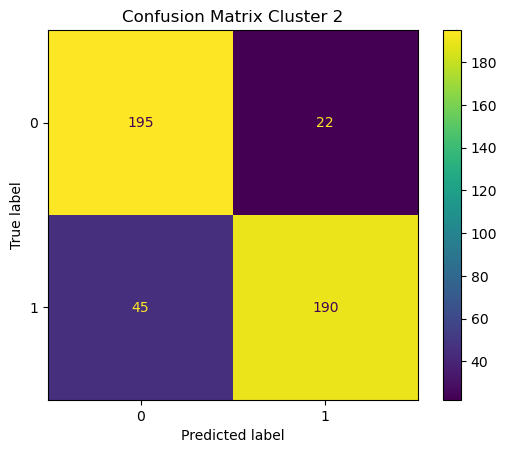

Accuracy Cluster 2:  0.8517699115044248
Precision Cluster 2:  0.8962264150943396
Recall Cluster 2:  0.8085106382978723


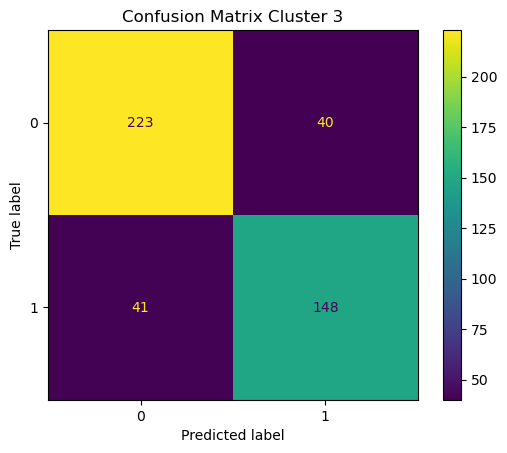

Accuracy Cluster 3:  0.8207964601769911
Precision Cluster 3:  0.7872340425531915
Recall Cluster 3:  0.783068783068783


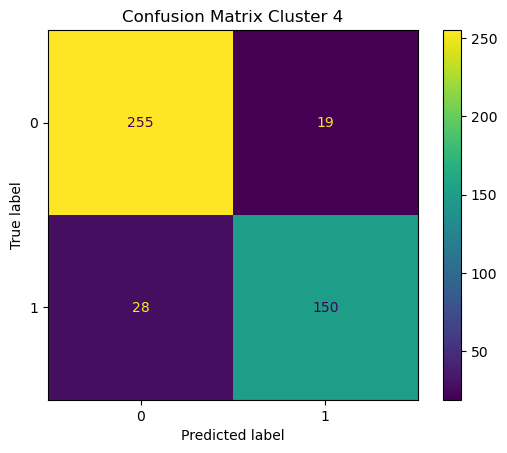

Accuracy Cluster 4:  0.8960176991150443
Precision Cluster 4:  0.8875739644970414
Recall Cluster 4:  0.8426966292134831


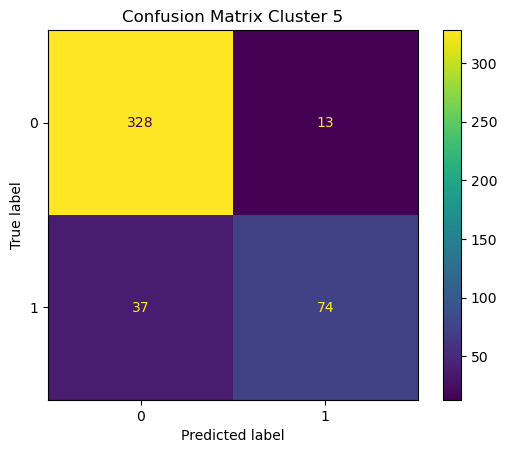

Accuracy Cluster 5:  0.8893805309734514
Precision Cluster 5:  0.8505747126436781
Recall Cluster 5:  0.6666666666666666


In [87]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in fst_model:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-1])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-1])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -1])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -1])

for i in range(len(fst_model)):
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    acc = accuracy_score(test_ys[i], y_pred)
    cm = confusion_matrix(test_ys[i], y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append((acc, precision_score(test_ys[i], y_pred), recall_score(test_ys[i], y_pred)))
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred))


In [88]:
# rf = RandomForestClassifier(n_estimators=100)
# model = rf.fit(train_X, train_y)

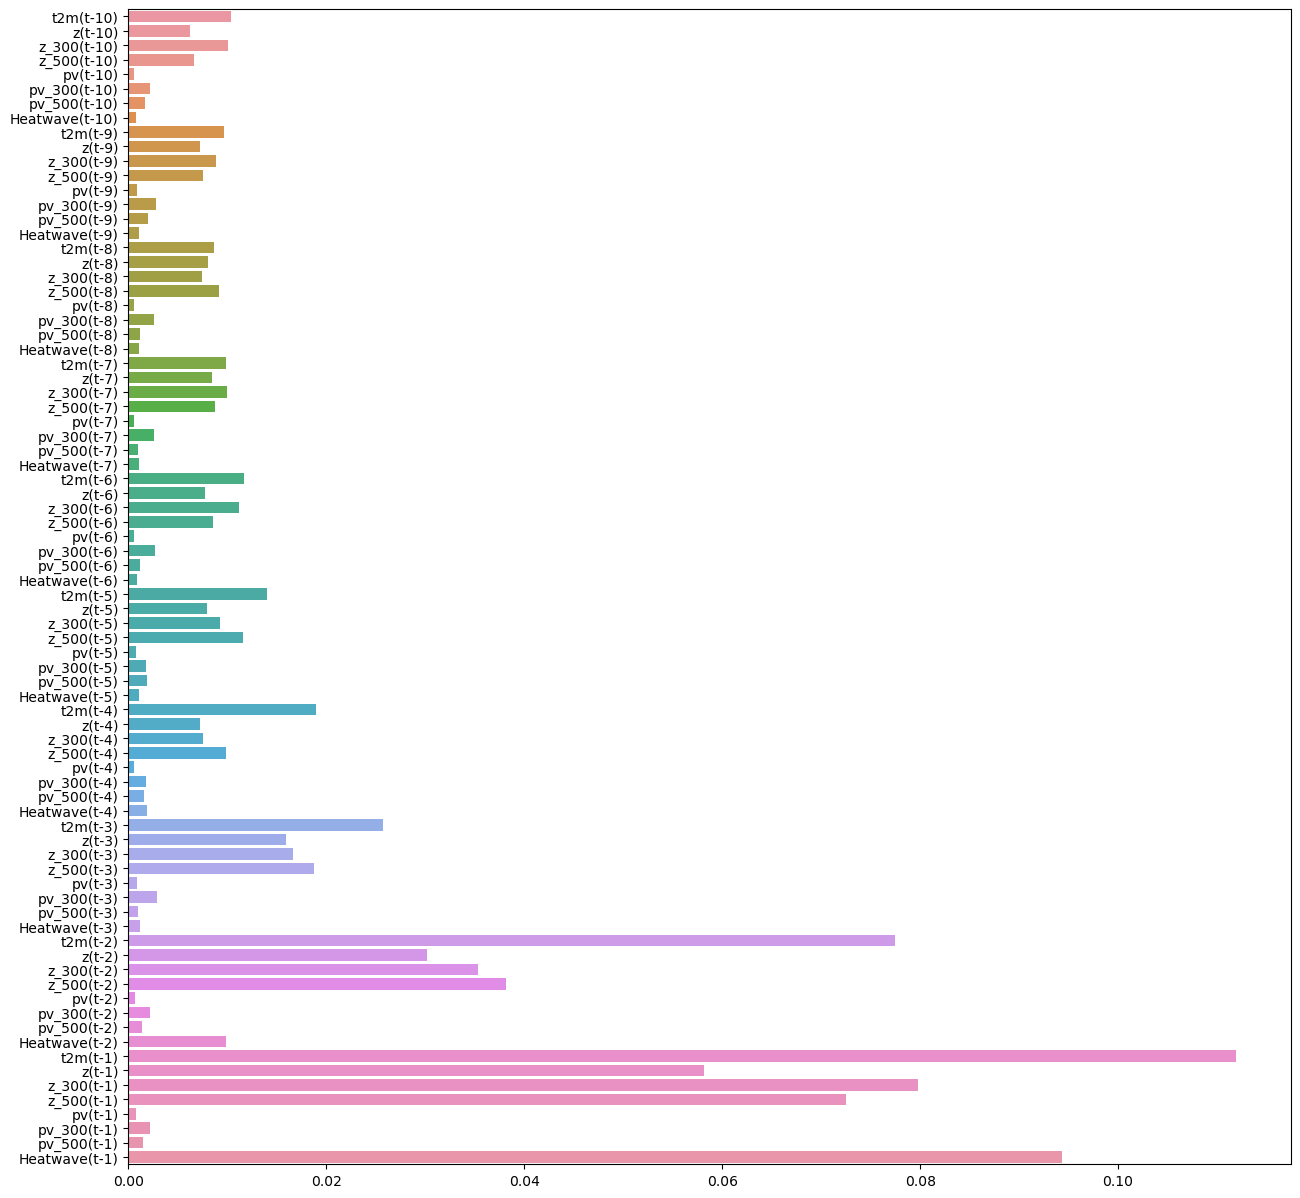

In [89]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = model.feature_importances_, y=model.feature_names_in_, ax=ax)
plt.show()

In [90]:
# imp_df = pd.DataFrame({'Feature':model.feature_names_in_, 
#                        'Importance':model.feature_importances_})

# imp_df.sort_values('Importance', ascending=False)

## Second Model: Dropping Potential Vorticity and Including Humidity

In [91]:
df_humid = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    df_humid.append(df[['time', 't2m', 'z', 'z_300', 'z_500', 'r', 'r_300', 'r_500',
                  'Heatwave']].set_index('time'))

scd_model = []
for df in df_humid:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10)
    data.drop(['t2m(t)', 'z(t)', 'r(t)', 'z_300(t)', 'z_500(t)', 
           'r_300(t)', 'r_500(t)'], inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data.set_index('time', inplace=True)
    scd_model.append(data)


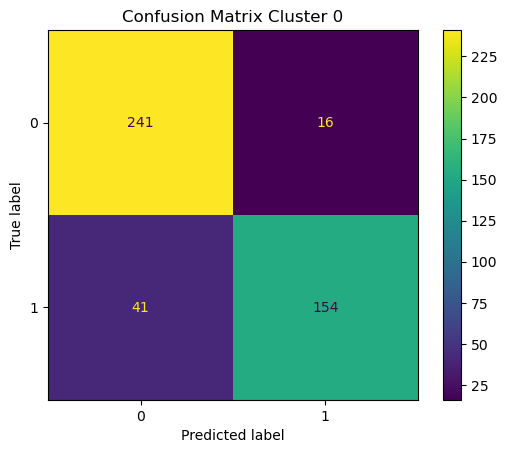

Accuracy Cluster 0:  0.8738938053097345
Precision Cluster 0:  0.9058823529411765
Recall Cluster 0:  0.7897435897435897


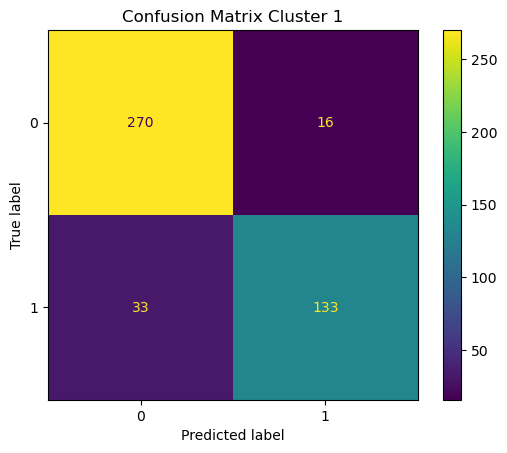

Accuracy Cluster 1:  0.8915929203539823
Precision Cluster 1:  0.8926174496644296
Recall Cluster 1:  0.8012048192771084


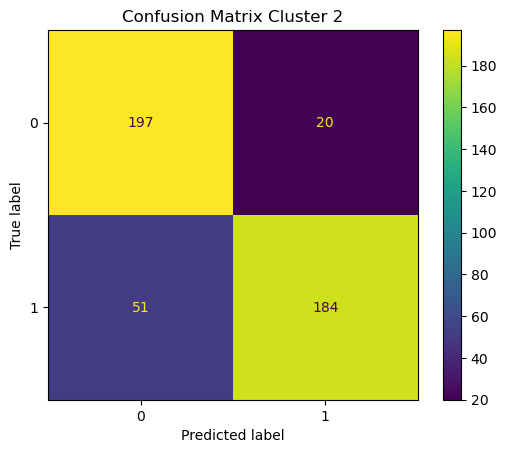

Accuracy Cluster 2:  0.8429203539823009
Precision Cluster 2:  0.9019607843137255
Recall Cluster 2:  0.7829787234042553


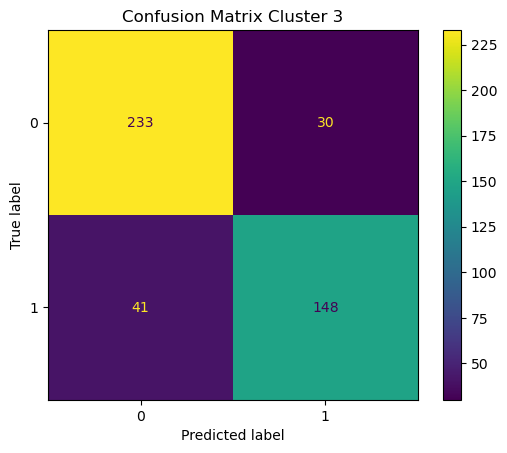

Accuracy Cluster 3:  0.8429203539823009
Precision Cluster 3:  0.8314606741573034
Recall Cluster 3:  0.783068783068783


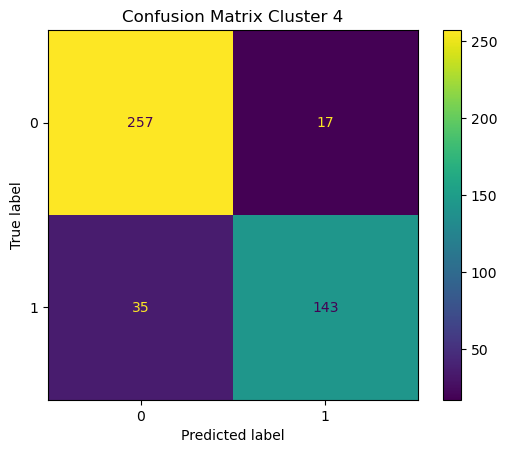

Accuracy Cluster 4:  0.8849557522123894
Precision Cluster 4:  0.89375
Recall Cluster 4:  0.8033707865168539


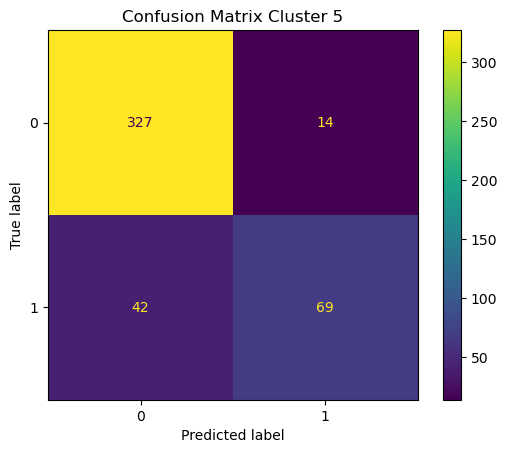

Accuracy Cluster 5:  0.8761061946902655
Precision Cluster 5:  0.8313253012048193
Recall Cluster 5:  0.6216216216216216


In [92]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in scd_model:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-1])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-1])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -1])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -1])

for i in range(len(fst_model)):
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    acc = accuracy_score(test_ys[i], y_pred)
    cm = confusion_matrix(test_ys[i], y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append((acc, precision_score(test_ys[i], y_pred), recall_score(test_ys[i], y_pred)))
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred))

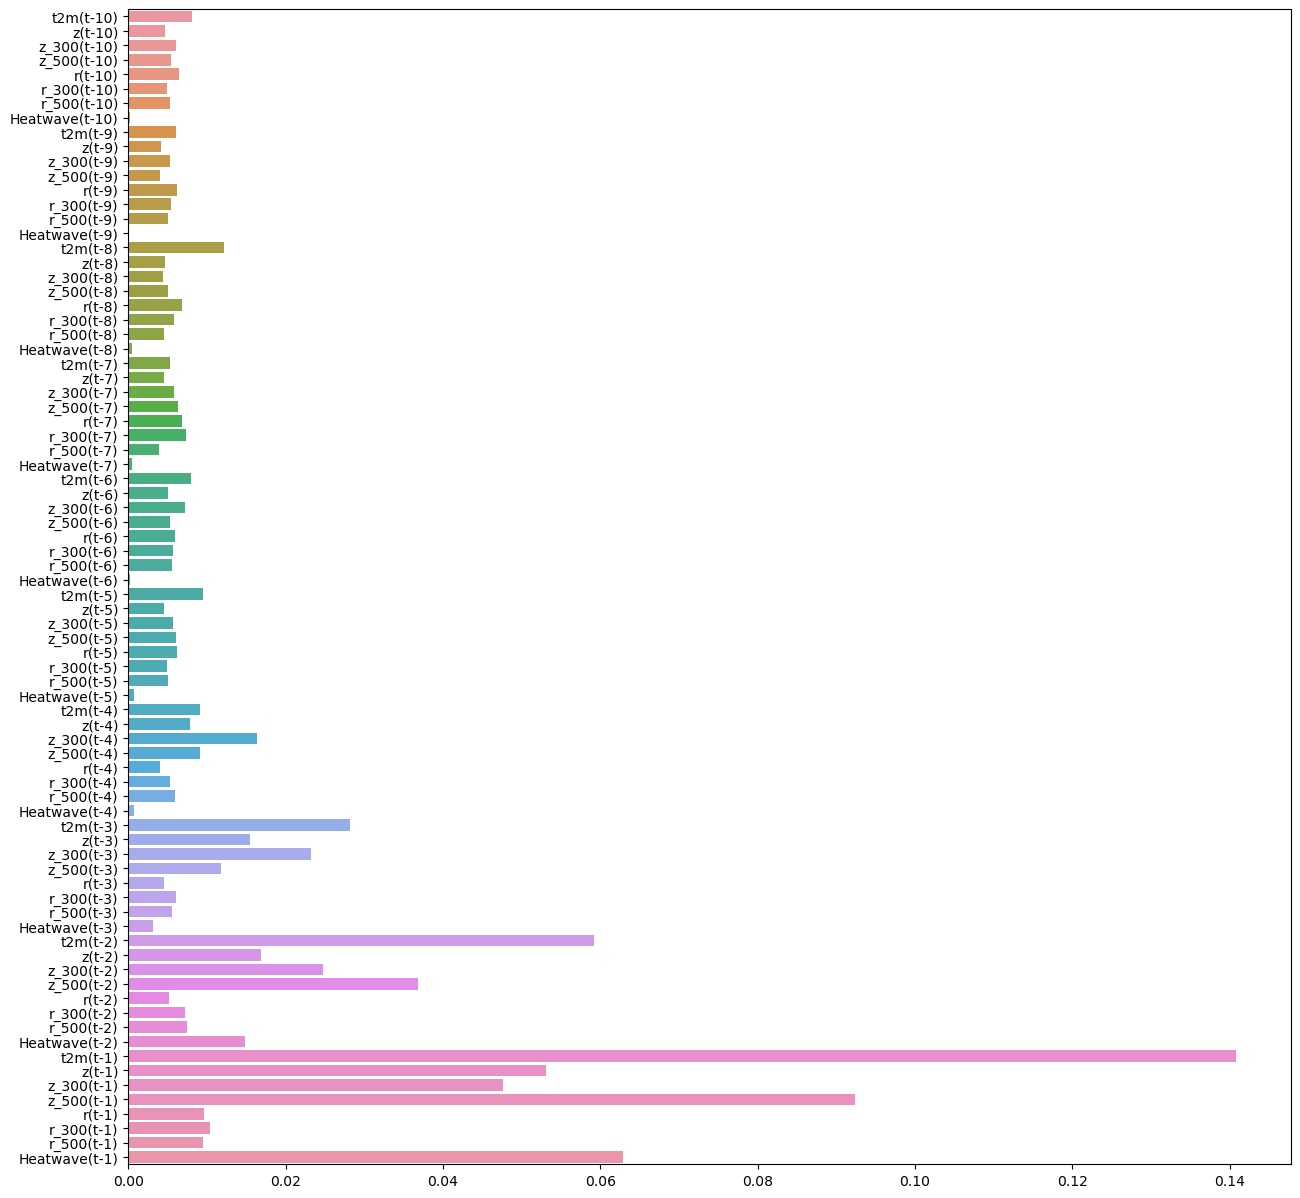

In [93]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = model.feature_importances_, y=model.feature_names_in_, ax=ax)
plt.show()

## Third Model: Using U and V Components of Wind

In [94]:
df_wind = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    df_wind.append(df[['time', 't2m', 'z', 'z_300', 'z_500', 'u', 'u_300', 'u_500',
                       'v', 'v_300', 'v_500','Heatwave']].set_index('time'))

thd_model = []
for df in df_wind:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10)
    data.drop(['t2m(t)', 'z(t)', 'u(t)', 'z_300(t)', 'z_500(t)', 
           'u_300(t)', 'u_500(t)', 'v(t)', 'v_300(t)', 'v_500(t)'], inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data.set_index('time', inplace=True)
    thd_model.append(data)


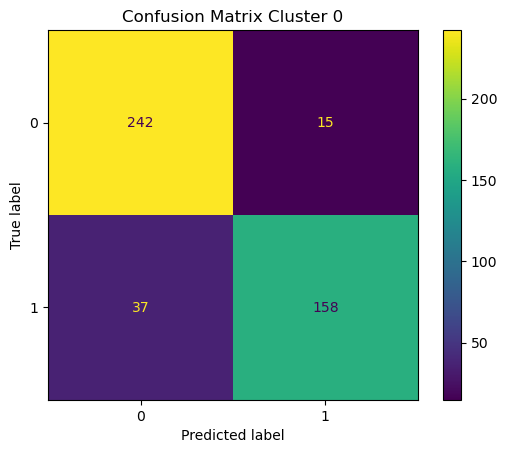

Accuracy Cluster 0:  0.8849557522123894
Precision Cluster 0:  0.9132947976878613
Recall Cluster 0:  0.8102564102564103


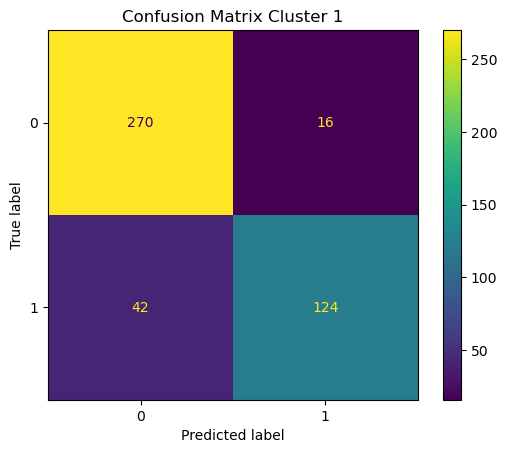

Accuracy Cluster 1:  0.8716814159292036
Precision Cluster 1:  0.8857142857142857
Recall Cluster 1:  0.7469879518072289


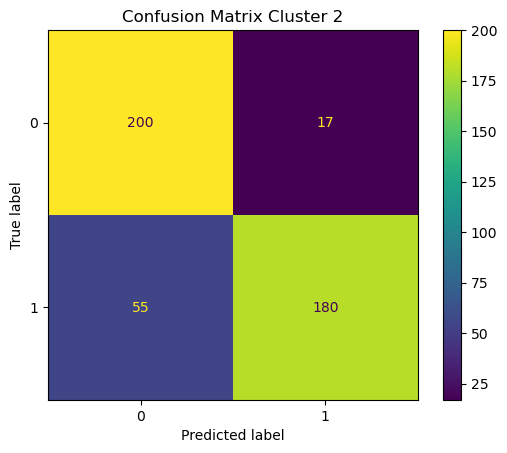

Accuracy Cluster 2:  0.8407079646017699
Precision Cluster 2:  0.9137055837563451
Recall Cluster 2:  0.7659574468085106


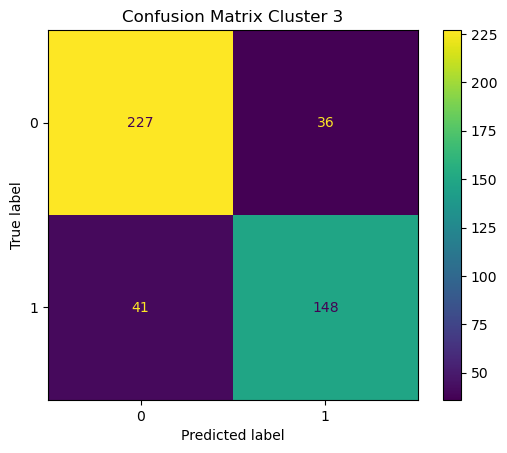

Accuracy Cluster 3:  0.8296460176991151
Precision Cluster 3:  0.8043478260869565
Recall Cluster 3:  0.783068783068783


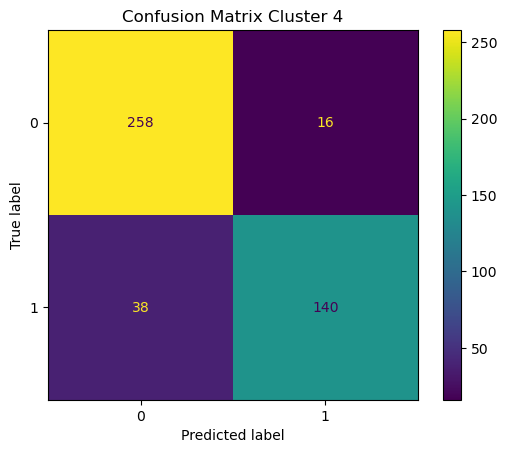

Accuracy Cluster 4:  0.8805309734513275
Precision Cluster 4:  0.8974358974358975
Recall Cluster 4:  0.7865168539325843


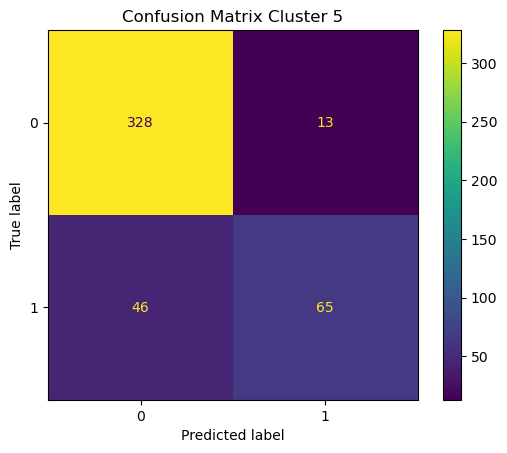

Accuracy Cluster 5:  0.8694690265486725
Precision Cluster 5:  0.8333333333333334
Recall Cluster 5:  0.5855855855855856


In [95]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in thd_model:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-1])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-1])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -1])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -1])

for i in range(len(fst_model)):
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    acc = accuracy_score(test_ys[i], y_pred)
    cm = confusion_matrix(test_ys[i], y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append((acc, precision_score(test_ys[i], y_pred), recall_score(test_ys[i], y_pred)))
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred))

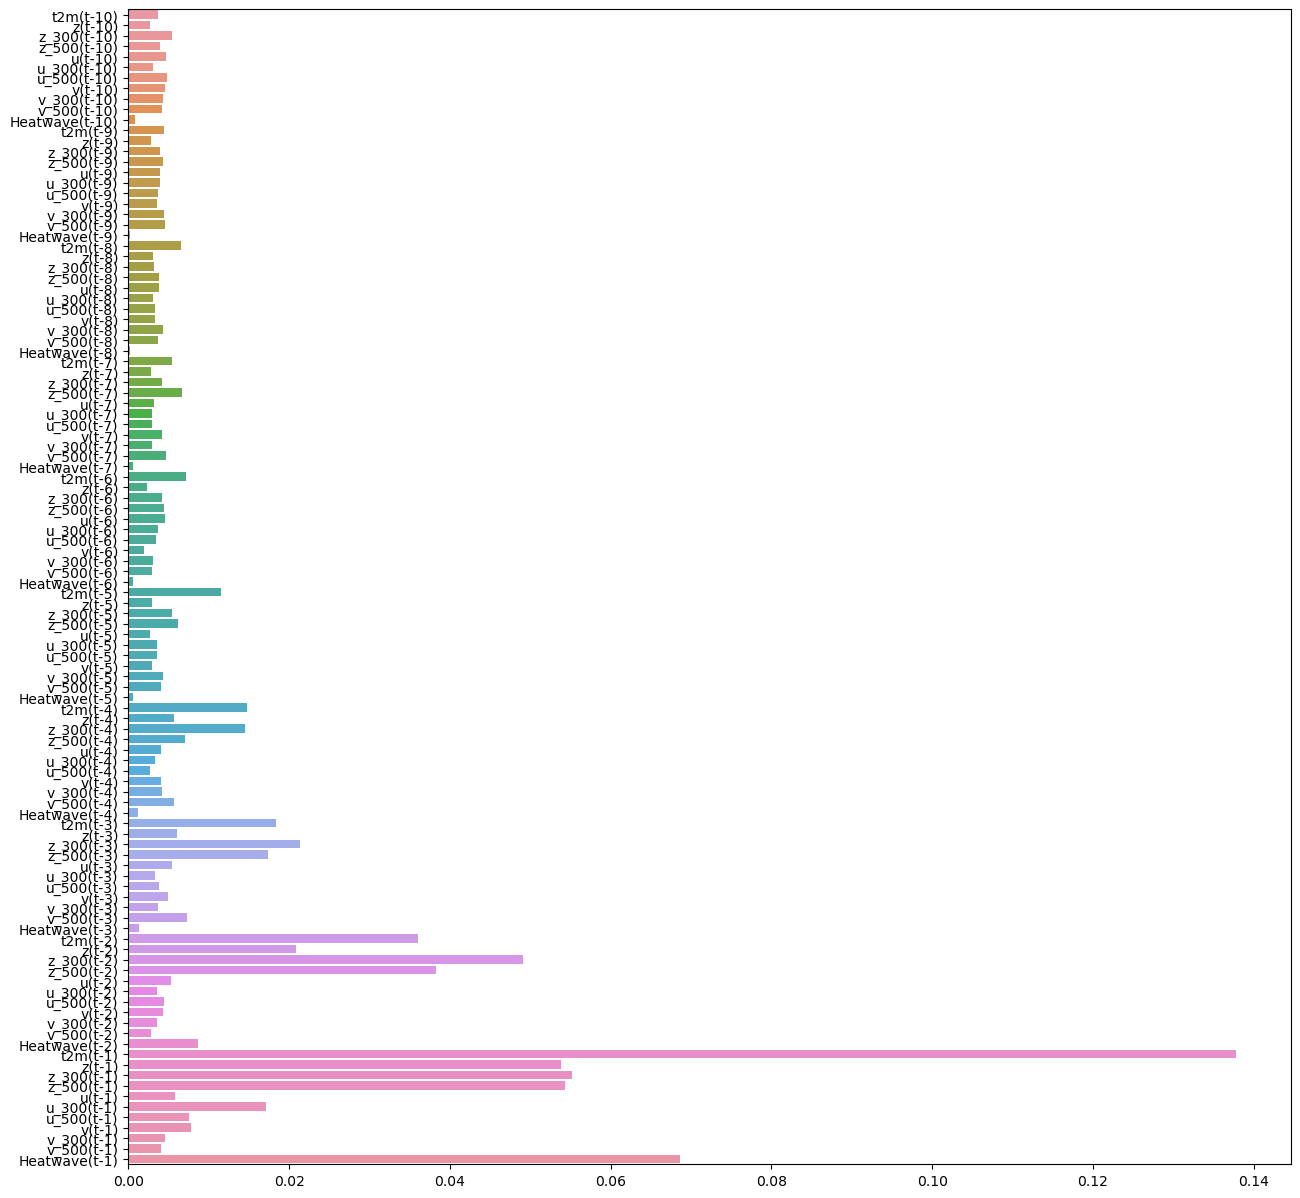

In [96]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = model.feature_importances_, y=model.feature_names_in_, ax=ax)
plt.show()

## Model 4: All Variables

In [97]:
df_all = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    df_all.append(df[['time', 't2m', 'z', 'z_300', 'z_500', 'u', 'u_300', 'u_500',
                       'v', 'v_300', 'v_500', 'q', 'q_300', 'q_500', 'r', 'r_300', 'r_500',
                       'pv', 'pv_300', 'pv_500', 'Heatwave']].set_index('time'))

fth_model = []
for df in df_all:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10)
    data.drop(['t2m(t)', 'z(t)', 'u(t)', 'z_300(t)', 'z_500(t)', 
           'u_300(t)', 'u_500(t)', 'v(t)', 'v_300(t)', 'v_500(t)', 'r(t)', 'r_300(t)',
           'r_500(t)', 'q(t)', 'q_300(t)', 'q_500(t)','pv(t)', 'pv_300(t)', 'pv_500(t)'], inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data.set_index('time', inplace=True)
    fth_model.append(data)


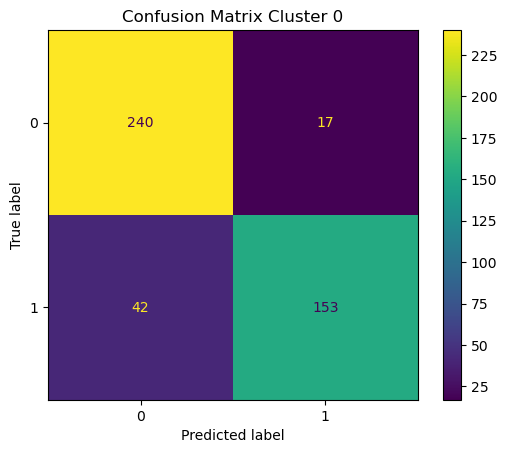

Accuracy Cluster 0:  0.8694690265486725
Precision Cluster 0:  0.9
Recall Cluster 0:  0.7846153846153846


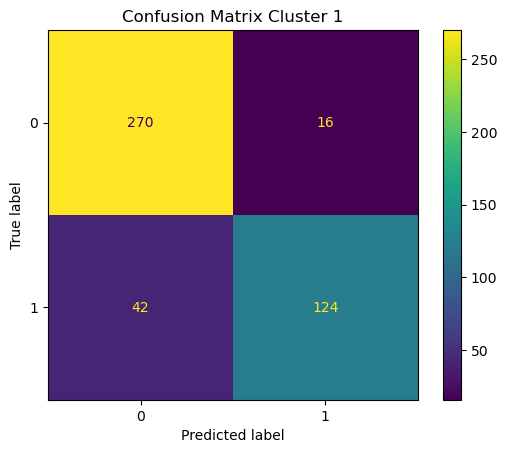

Accuracy Cluster 1:  0.8716814159292036
Precision Cluster 1:  0.8857142857142857
Recall Cluster 1:  0.7469879518072289


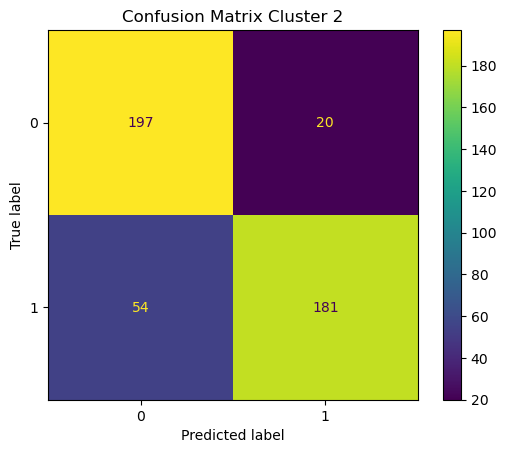

Accuracy Cluster 2:  0.8362831858407079
Precision Cluster 2:  0.900497512437811
Recall Cluster 2:  0.7702127659574468


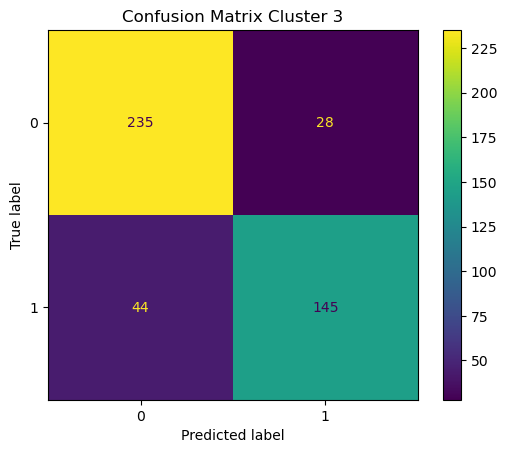

Accuracy Cluster 3:  0.8407079646017699
Precision Cluster 3:  0.838150289017341
Recall Cluster 3:  0.7671957671957672


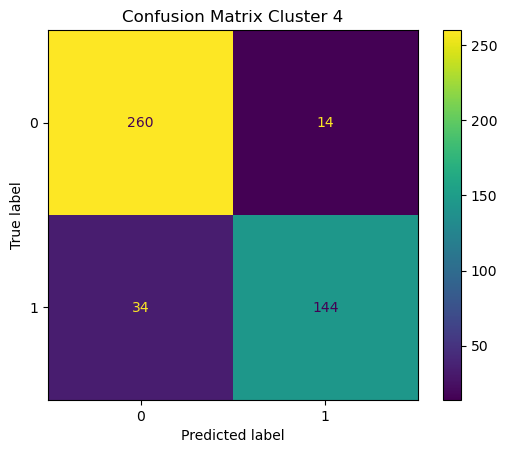

Accuracy Cluster 4:  0.8938053097345132
Precision Cluster 4:  0.9113924050632911
Recall Cluster 4:  0.8089887640449438


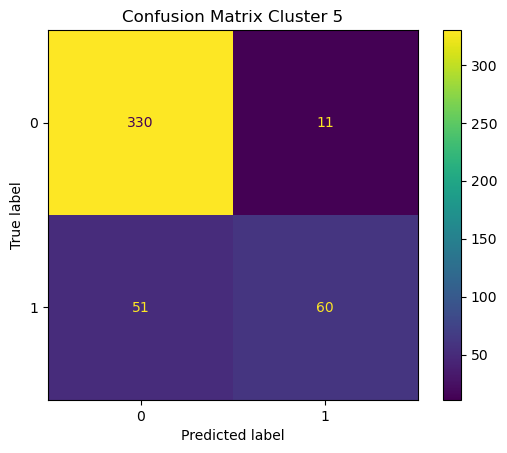

Accuracy Cluster 5:  0.8628318584070797
Precision Cluster 5:  0.8450704225352113
Recall Cluster 5:  0.5405405405405406


In [98]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in fth_model:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-1])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-1])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -1])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -1])

for i in range(len(fst_model)):
    rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    acc = accuracy_score(test_ys[i], y_pred)
    cm = confusion_matrix(test_ys[i], y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append((acc, precision_score(test_ys[i], y_pred), recall_score(test_ys[i], y_pred)))
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred))

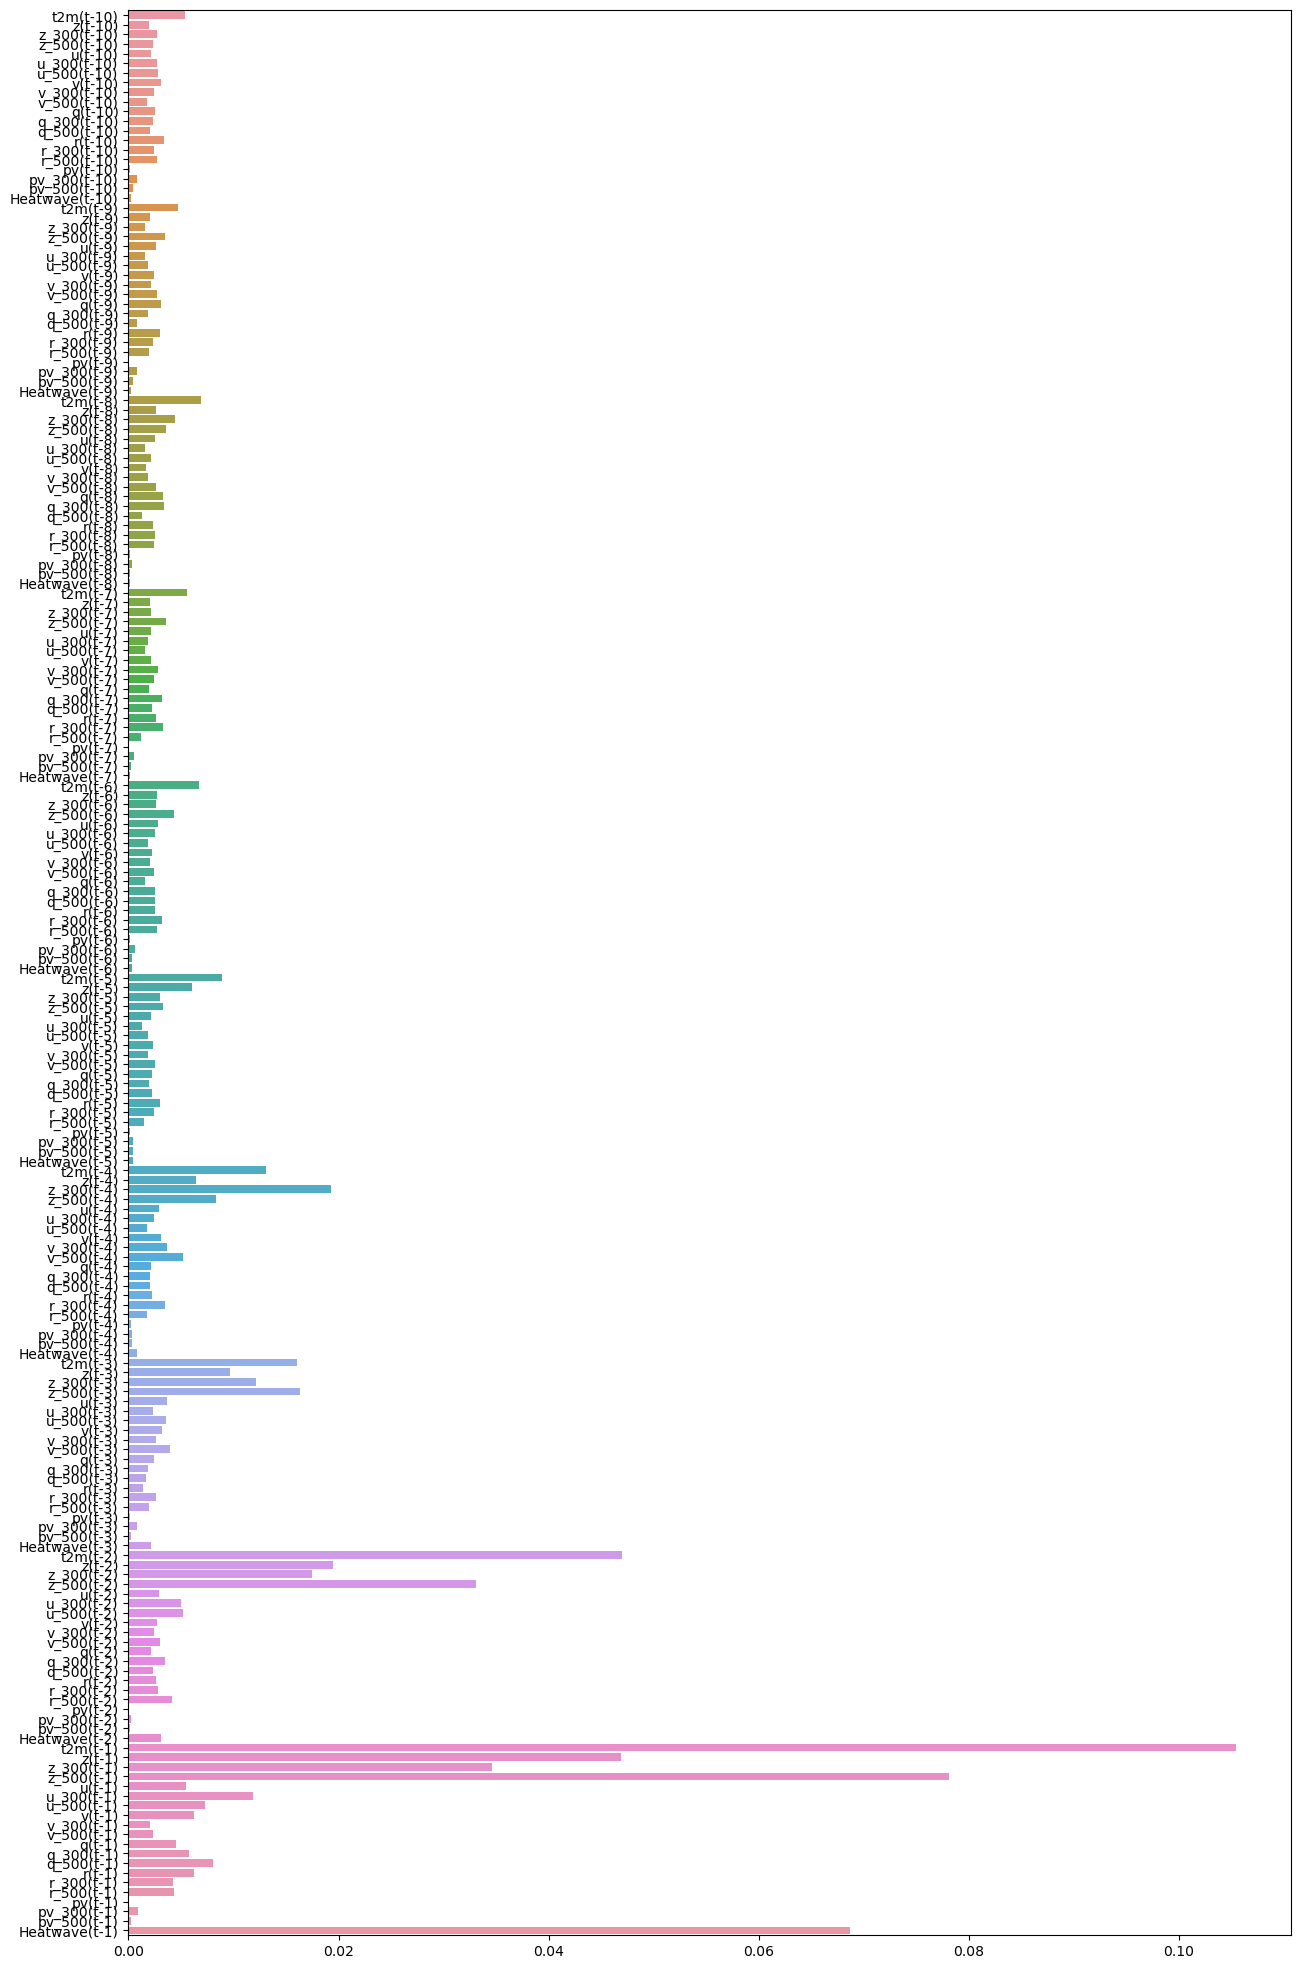

In [99]:
fig, ax = plt.subplots(figsize = (15,25))
sns.barplot(x = model.feature_importances_, y=model.feature_names_in_, ax=ax)
plt.show()

In [100]:
c0_metrics

[(0.8738938053097345, 0.8876404494382022, 0.8102564102564103),
 (0.8783185840707964, 0.9069767441860465, 0.8),
 (0.8738938053097345, 0.9058823529411765, 0.7897435897435897),
 (0.8849557522123894, 0.9132947976878613, 0.8102564102564103),
 (0.8694690265486725, 0.9, 0.7846153846153846)]

In [101]:
c1_metrics

[(0.8849557522123894, 0.85625, 0.8253012048192772),
 (0.8938053097345132, 0.8831168831168831, 0.8192771084337349),
 (0.8915929203539823, 0.8926174496644296, 0.8012048192771084),
 (0.8716814159292036, 0.8857142857142857, 0.7469879518072289),
 (0.8716814159292036, 0.8857142857142857, 0.7469879518072289)]

In [102]:
c2_metrics

[(0.8407079646017699, 0.8826291079812206, 0.8),
 (0.8517699115044248, 0.8962264150943396, 0.8085106382978723),
 (0.8429203539823009, 0.9019607843137255, 0.7829787234042553),
 (0.8407079646017699, 0.9137055837563451, 0.7659574468085106),
 (0.8362831858407079, 0.900497512437811, 0.7702127659574468)]

In [103]:
c3_metrics

[(0.8296460176991151, 0.7978723404255319, 0.7936507936507936),
 (0.8207964601769911, 0.7872340425531915, 0.783068783068783),
 (0.8429203539823009, 0.8314606741573034, 0.783068783068783),
 (0.8296460176991151, 0.8043478260869565, 0.783068783068783),
 (0.8407079646017699, 0.838150289017341, 0.7671957671957672)]

In [104]:
c4_metrics

[(0.8871681415929203, 0.8757396449704142, 0.8314606741573034),
 (0.8960176991150443, 0.8875739644970414, 0.8426966292134831),
 (0.8849557522123894, 0.89375, 0.8033707865168539),
 (0.8805309734513275, 0.8974358974358975, 0.7865168539325843),
 (0.8938053097345132, 0.9113924050632911, 0.8089887640449438)]

In [105]:
c5_metrics

[(0.8827433628318584, 0.7685185185185185, 0.7477477477477478),
 (0.8893805309734514, 0.8505747126436781, 0.6666666666666666),
 (0.8761061946902655, 0.8313253012048193, 0.6216216216216216),
 (0.8694690265486725, 0.8333333333333334, 0.5855855855855856),
 (0.8628318584070797, 0.8450704225352113, 0.5405405405405406)]

# Mutli-Day Forecasts

Baseline Model

In [106]:
bdfs = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    bdfs.append(df[['time', 't2m', 'Heatwave']].set_index('time'))

baselines = []
for df in bdfs:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10, n_out=10)
    drop_features = []
    for i in np.arange(10):
        if i == 0:
            drop_features += ['t2m(t)']
        else:
            drop_features += ['t2m(t+'+str(i)+')']
    data.drop(drop_features, inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data = data[(data['time'].dt.month < 9) | ((data['time'].dt.month == 8) & (data['time'].dt.day < 20))]
    data.set_index('time', inplace=True)
    baselines.append(data)

In [107]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in baselines:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-10])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-10])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -10:])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -10:])

In [108]:
for i in range(len(baselines)):
    rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    acc = accuracy_score(test_ys[i], y_pred)
    accs = []
    for k in range(len(y_pred)):
        accs.append(100 - (np.sum(y_pred[k]) - np.sum(test_ys[i].iloc[k]))**2)

    acc = np.mean(accs)/100

    # cm = confusion_matrix(test_ys[i], y_pred)
    # ConfusionMatrixDisplay(cm).plot()
    # plt.title('Confusion Matrix Cluster '+str(i))
    # plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append(acc)
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred, average='macro'))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred, average='macro'))

Accuracy Cluster 0:  0.8296348314606742
Precision Cluster 0:  0.754407464601712
Recall Cluster 0:  0.4378004552218081
Accuracy Cluster 1:  0.8653089887640449
Precision Cluster 1:  0.7017354339137988
Recall Cluster 1:  0.47802494563367903
Accuracy Cluster 2:  0.8218820224719101
Precision Cluster 2:  0.7204327264620412
Recall Cluster 2:  0.45700424721296484
Accuracy Cluster 3:  0.8564606741573034
Precision Cluster 3:  0.6818763679795253
Recall Cluster 3:  0.5485174814323829
Accuracy Cluster 4:  0.8865730337078652
Precision Cluster 4:  0.744179840039516
Recall Cluster 4:  0.5483587244930742
Accuracy Cluster 5:  0.8940449438202248
Precision Cluster 5:  0.6099132391536042
Recall Cluster 5:  0.23364207880318402


1st Model

In [109]:
df_simple = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    df_simple.append(df[['time', 't2m', 'z', 'z_300', 'z_500', 'pv', 'pv_300', 'pv_500',
                  'Heatwave']].set_index('time'))

fst_model = []
for df in df_simple:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10, n_out=10)
    drop_features = []
    for i in np.arange(10):
        if i == 0:
            drop_features += ['t2m(t)', 'z(t)', 'pv(t)', 'z_300(t)', 'z_500(t)', 
            'pv_300(t)', 'pv_500(t)']
        else:
            drop_features += ['t2m(t+'+str(i)+')', 'z(t+'+str(i)+')', 'pv(t+'+str(i)+')', 'z_300(t+'+str(i)+')', 
                            'z_500(t+'+str(i)+')', 'pv_300(t+'+str(i)+')', 'pv_500(t+'+str(i)+')']
    data.drop(drop_features, inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data = data[(data['time'].dt.month < 9) | ((data['time'].dt.month == 8) & (data['time'].dt.day < 20))]
    data.set_index('time', inplace=True)
    fst_model.append(data)

In [110]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in fst_model:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-10])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-10])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -10:])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -10:])

for i in range(len(fst_model)):
    rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    accs = []
    for k in range(len(y_pred)):
        accs.append(10 - np.sqrt((np.sum(y_pred[k]) - np.sum(test_ys[i].iloc[k]))**2))

    acc = np.mean(accs)/10
    # acc = accuracy_score(test_ys[i], y_pred)
    # cm = confusion_matrix(test_ys[i], y_pred)
    # ConfusionMatrixDisplay(cm).plot()
    # plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append(acc)
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred, average='macro'))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred, average='macro'))


    # This model does strictly better than the baseline in accuracy
    # Cluster 3 generally seems hardest to get accurate
    # Cluster 5 has lowest precision/recall score


Accuracy Cluster 0:  0.7002808988764044
Precision Cluster 0:  0.7865298229935029
Recall Cluster 0:  0.47860199362115907
Accuracy Cluster 1:  0.723314606741573
Precision Cluster 1:  0.6523091627531843
Recall Cluster 1:  0.48148683992106767
Accuracy Cluster 2:  0.6820224719101123
Precision Cluster 2:  0.7480376154798776
Recall Cluster 2:  0.503717888961101
Accuracy Cluster 3:  0.703932584269663
Precision Cluster 3:  0.6584158822373805
Recall Cluster 3:  0.5392502683533761
Accuracy Cluster 4:  0.7567415730337078
Precision Cluster 4:  0.7251945919280987
Recall Cluster 4:  0.5722299667719742
Accuracy Cluster 5:  0.7626404494382022
Precision Cluster 5:  0.47075800705146476
Recall Cluster 5:  0.24673375648540213


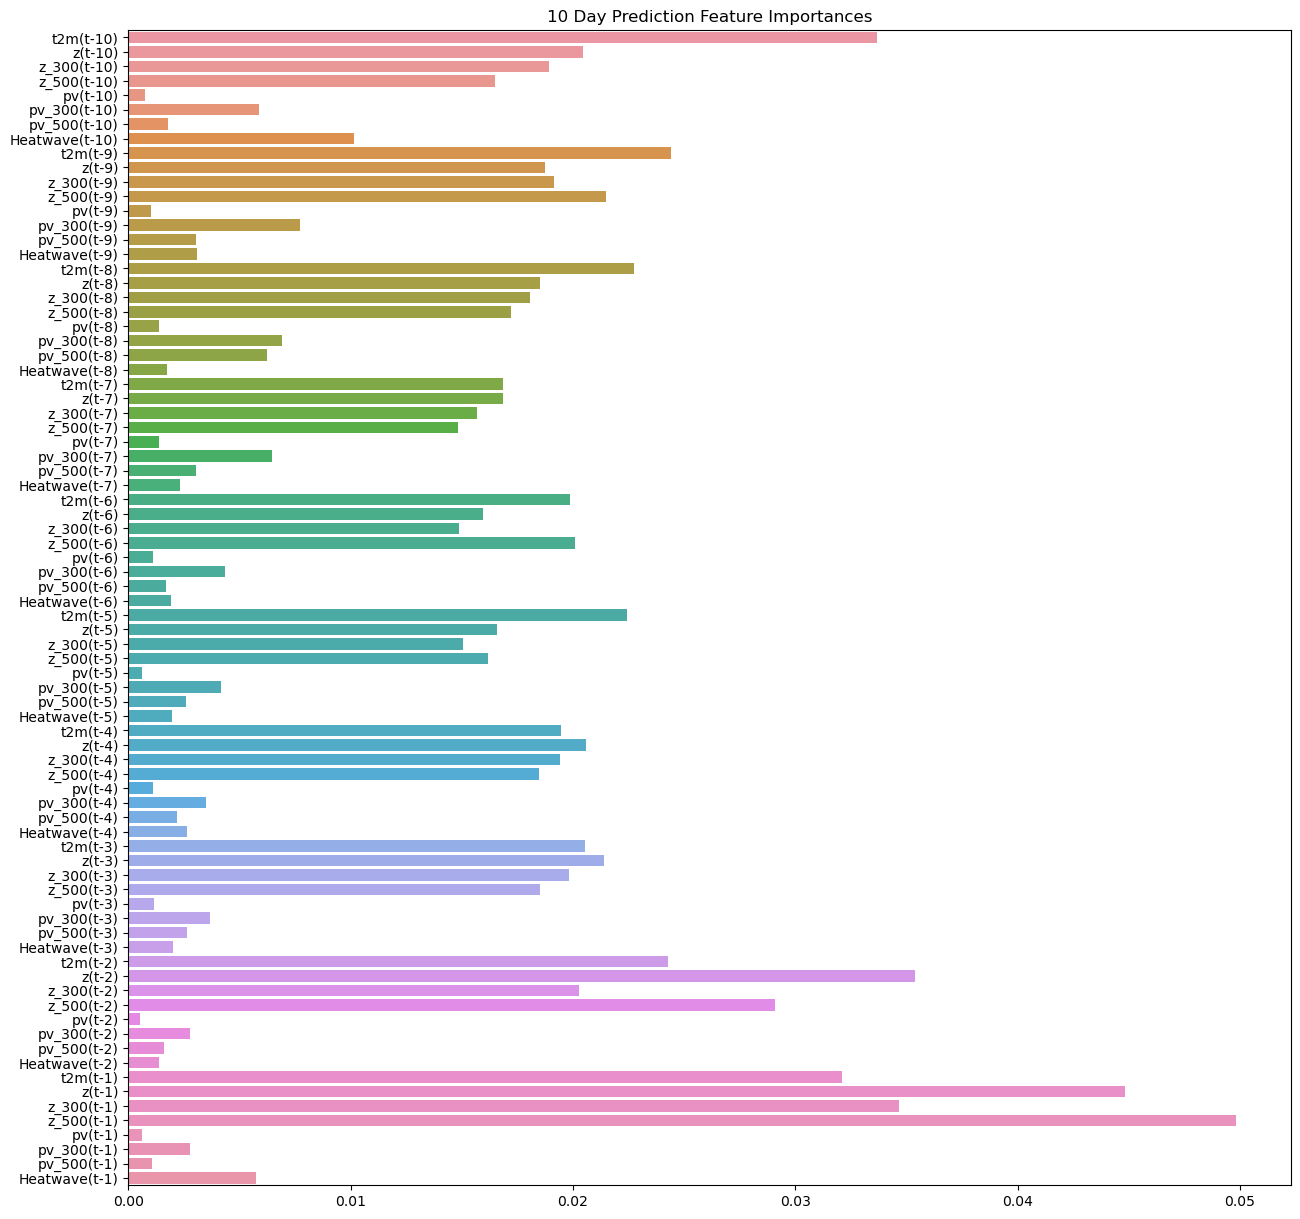

In [111]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = model.feature_importances_, y=model.feature_names_in_, ax=ax)
plt.title('10 Day Prediction Feature Importances')
plt.show()

## With Curriculum Training

In [114]:
def filter_hw(row):
    strs = []
    for i in range(10):
        strs.append('Heatwave(t-'+str(i+1)+')')

    for s in strs:
        if row[s] == 1:
            return 0
    
    return 1



In [115]:
df_simple = []
for df in new_dfs:
    df['time'] = pd.to_datetime(df['time'])
    df_simple.append(df[['time', 't2m', 'z', 'z_300', 'z_500', 'pv', 'pv_300', 'pv_500',
                  'Heatwave']].set_index('time'))

fst_run = []
scd_run = []
for df in df_simple:
    values = df.values
    data = series_to_supervised(values, columns=df.columns, index=df.index,
                                n_in=10, n_out=10)
    drop_features = []
    for i in np.arange(10):
        if i == 0:
            drop_features += ['t2m(t)', 'z(t)', 'pv(t)', 'z_300(t)', 'z_500(t)', 
            'pv_300(t)', 'pv_500(t)']
        else:
            drop_features += ['t2m(t+'+str(i)+')', 'z(t+'+str(i)+')', 'pv(t+'+str(i)+')', 'z_300(t+'+str(i)+')', 
                            'z_500(t+'+str(i)+')', 'pv_300(t+'+str(i)+')', 'pv_500(t+'+str(i)+')']
    data.drop(drop_features, inplace=True, axis=1)
    data.reset_index(inplace=True)
    data = data[(data['time'].dt.month > 5) | ((data['time'].dt.month == 5) & (data['time'].dt.day > 10))]
    data = data[(data['time'].dt.month < 9) | ((data['time'].dt.month == 8) & (data['time'].dt.day < 20))]
    data.set_index('time', inplace=True)
    test = data[data.index >= datetime(2019, 8, 9)]
    train = data[data.index < datetime(2019, 8, 9)]
    train['no_hw'] = train.apply(filter_hw, axis=1)
    curr_data = train[train['no_hw']==0]
    curr2_data = train[train['no_hw']==1]
    curr_data.drop('no_hw', axis=1, inplace=True)
    curr2_data.drop('no_hw', axis=1, inplace=True)
    data = pd.concat([curr_data, curr2_data, test])
    fst_run.append(data)
    #scd_run.append(data)


C:\Users\jedbe\AppData\Local\Temp\ipykernel_16256\3520330981.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['no_hw'] = train.apply(filter_hw, axis=1)
C:\Users\jedbe\AppData\Local\Temp\ipykernel_16256\3520330981.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_data.drop('no_hw', axis=1, inplace=True)
C:\Users\jedbe\AppData\Local\Temp\ipykernel_16256\3520330981.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [116]:
train_xs = []
test_xs = []
train_ys = []
test_ys = []

for df in fst_run:
    train_xs.append(df.iloc[:int(round(len(df)*0.8, 0)), :-10])
    test_xs.append(df.iloc[int(round(len(df)*0.8, 0)):, :-10])
    train_ys.append(df.iloc[:int(round(len(df)*0.8, 0)), -10:])
    test_ys.append(df.iloc[int(round(len(df)*0.8, 0)):, -10:])


for i in range(len(fst_run)):
    rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
    model = rf.fit(train_xs[i], train_ys[i])
    y_pred = model.predict(test_xs[i])

    accs = []
    for k in range(len(y_pred)):
        accs.append(10 - np.sqrt((np.sum(y_pred[k]) - np.sum(test_ys[i].iloc[k]))**2))

    acc = np.mean(accs)/10
    # acc = accuracy_score(test_ys[i], y_pred)
    # cm = confusion_matrix(test_ys[i], y_pred)
    # ConfusionMatrixDisplay(cm).plot()
    # plt.title('Confusion Matrix Cluster '+str(i))
    plt.show()
    print('Accuracy Cluster '+str(i)+': ', acc)
    metrics_lists[i].append(acc)
    print('Precision Cluster '+str(i)+': ', precision_score(test_ys[i], y_pred, average='macro'))
    print('Recall Cluster '+str(i)+': ', recall_score(test_ys[i], y_pred, average='macro'))


    # This model does strictly better than class weighting in terms of recall
    # Cluster 3 generally seems hardest to get accurate
    # Cluster 5 has lowest precision/recall score by far and this only improved it marginally


Accuracy Cluster 0:  0.6935393258426966
Precision Cluster 0:  0.7732034129418578
Recall Cluster 0:  0.4696505065213966
Accuracy Cluster 1:  0.7258426966292135
Precision Cluster 1:  0.6639346307110007
Recall Cluster 1:  0.486293717527134
Accuracy Cluster 2:  0.6837078651685393
Precision Cluster 2:  0.7481920731438129
Recall Cluster 2:  0.5116713272918821
Accuracy Cluster 3:  0.7137640449438203
Precision Cluster 3:  0.6743581043160454
Recall Cluster 3:  0.5500147665025275
Accuracy Cluster 4:  0.7446629213483147
Precision Cluster 4:  0.7219968375637464
Recall Cluster 4:  0.545096503561154
Accuracy Cluster 5:  0.7564606741573033
Precision Cluster 5:  0.5095925732840645
Recall Cluster 5:  0.2526526786799987


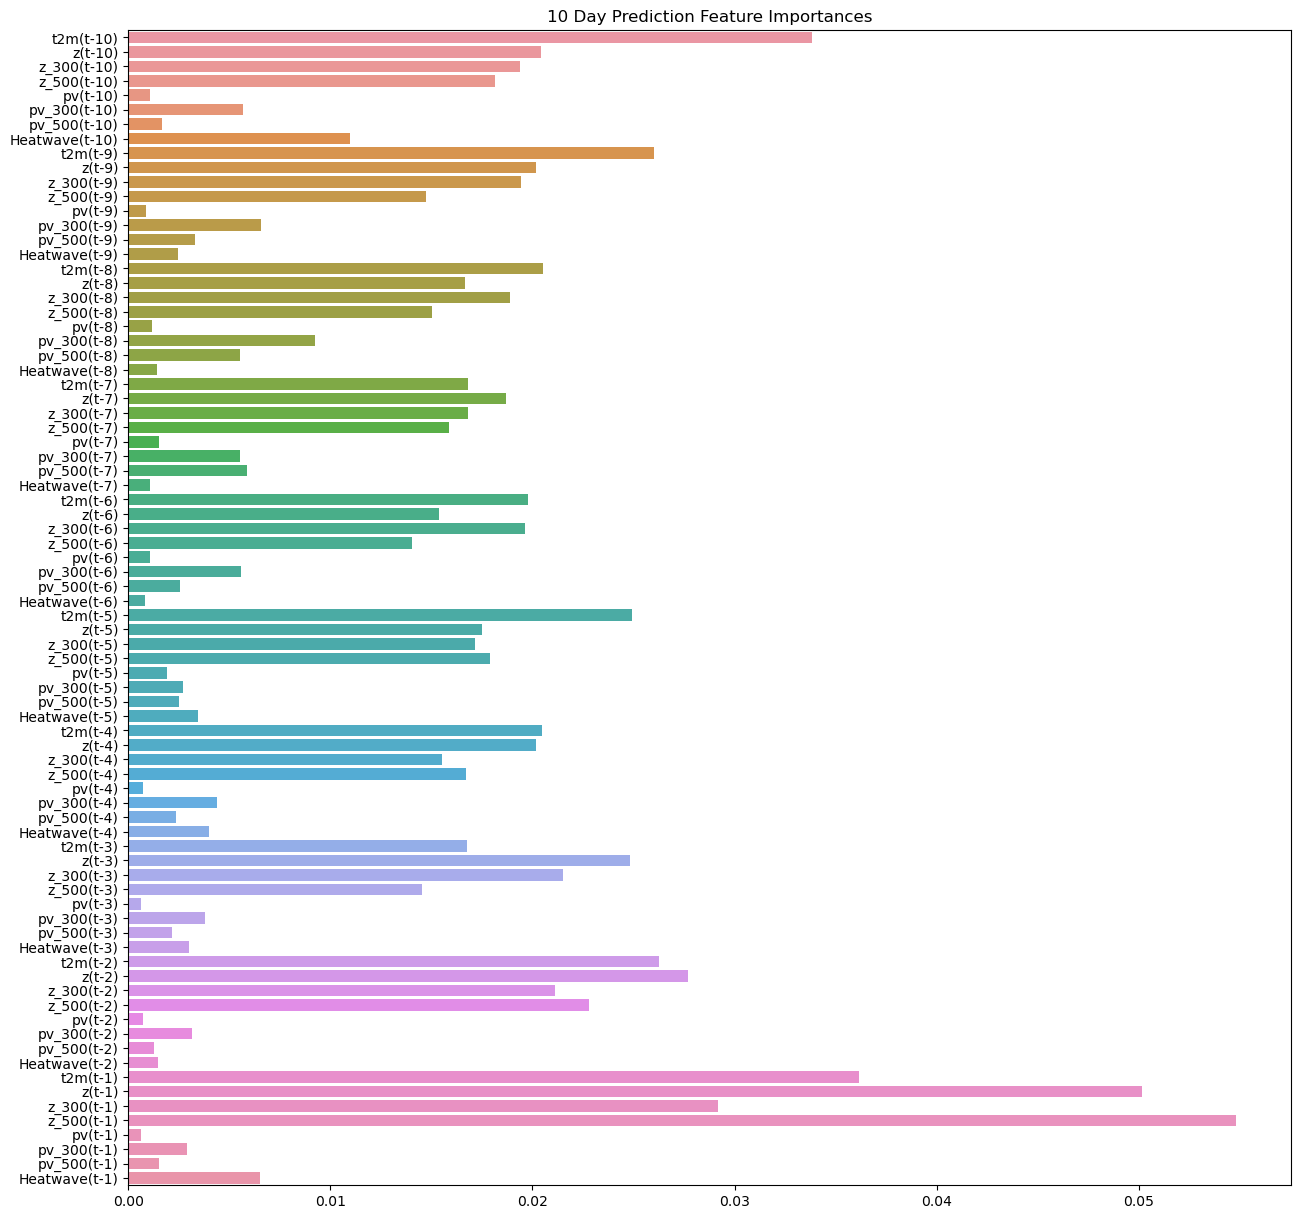

In [117]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = model.feature_importances_, y=model.feature_names_in_, ax=ax)
plt.title('10 Day Prediction Feature Importances')
plt.show()